# CEO Questions 

## Business question
1. What are the properties that House Rocket should i buy it and at what price?
2. Once the house is purchased, what is the best when to sell them and at what price?

## Imports

In [703]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import gridspec
from matplotlib import pyplot as plt
import ipywidgets as widgets
import plotly.express as px
from ipywidgets import interact, interactive, fixed, interact_manual
from geopy.geocoders import Nominatim
import missingno                                   as msno


### Auxiliary functions 

In [704]:
## # Supress Scientific Notation

np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

## Loading data

In [705]:
df=pd.read_csv('Datasets/kc_house_data.csv',parse_dates=[1,14])

## Dataset info

In [706]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955-01-01,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951-01-01,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933-01-01,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965-01-01,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987-01-01,0,98074,47.62,-122.05,1800,7503


In [707]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  datetime64[ns]
 15  yr_renovated   2161

### Change types

In [708]:
df['condition'] = df['condition'].astype( str )
df['yr_renovated'] = df['yr_renovated'].apply( lambda x: pd.to_datetime( x,format='%Y') if x > 0 else x )

| Attributes     | Meaning                                                                                                                                                                                              |
|----------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id             | Unique ID for each home sold                                                                                                                                                                         |
| date           | Date of the home sale                                                                                                                                                                                |
| price          | Price of each home sold                                                                                                                                                                              |
| bedrooms       | Number of bedrooms                                                                                                                                                                                   |
| bathrooms      | Number of bathrooms, where .5 accounts for a room with a toilet but no shower                                                                                                                        |
| sqft_living    | Square footage of the apartments interior living space                                                                                                                                               |
| sqft_lot       | Square footage of the land space                                                                                                                                                                     |
| floors         | Number of floors                                                                                                                                                                                     |
| waterfront     | A dummy variable for whether the apartment was overlooking the waterfront or not                                                                                                                     |
| view           | An index from 0 to 4 of how good the view of the property was                                                                                                                                        |
| condition      | An index from 1 to 5 on the condition of the apartment                                                                                                                                               |
| grade          | An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. |
| sqft_above     | The square footage of the interior housing space that is above ground level                                                                                                                          |
| sqft_basement  | The square footage of the interior housing space that is below ground level                                                                                                                          |
| yr_built       | The year the house was initially built                                                                                                                                                               |
| yr_renovated   | The year of the house’s last renovation                                                                                                                                                              |
| zipcode        | What zipcode area the house is in                                                                                                                                                                    |
| sqft_living15  | The square footage of interior housing living space for the nearest 15 neighbors                                                                                                                     |
| sqft_lot15     | The square footage of the land lots of the nearest 15 neighbors    

## Insights

1. How many homes are available for purchase?
2. How many attributes do houses have?
3. What are the attributes of the houses?
4. What is the most expensive house (house with the highest sale value)?
5. Which house has the most rooms?
6. What is the sum total of quarters in the dataset?
7. How many houses have 2 bathrooms?
8. What is the average price of all houses in the dataset?
9. What is the average price of 2 bathroom homes?
10. What is the minimum price for 3 bedroom homes?
11. How many houses have more than 300 square meters in the living room?
Of being?
12. How many houses have more than 2 floors?
13. How many houses have a sea view?
14. Of the houses with sea views, how many have 3 bedrooms?
15. Of the houses with more than 300 square meters of living room,
how many have more than 2 bathrooms?

In [709]:
print( 'Number of houses available for purchase: {}'.format( df.shape[0] ) )
print( 'Features by house: {}'.format( df.shape[1] ) )

Number of houses available for purchase: 21613
Features by house: 21


In [710]:
house_expensive_id = df[['id', 'price']].sort_values('price', ascending=False ).loc[0,'id']
print( 'Features by house: {}'.format( house_expensive_id) )
house_bedrooms_id = df[['id', 'bedrooms']].sort_values('bedrooms', ascending=False ).iloc[0,0]
print( 'Features by house: {}'.format( house_bedrooms_id) )
print( 'summ bedrooms: {}'.format( df['bedrooms'].sum() ))
data = df.loc[df['bathrooms'] == 2, :]
num_houses = len( data )
print( 'Total number of houses with 2 bathrooms: {}'.format( num_houses ) )
avg_price = np.round( df['price'].mean(), 2 )
print( 'Average Price: ${}'.format( avg_price ) )
avg_price = np.round( data.loc[data['bathrooms'] == 2, 'price'].mean(), 2 )
print( 'Average Price: ${}'.format( avg_price ) )
min_price = np.round( df.loc[df['bedrooms'] == 3, 'price'].min(), 2 )
print( 'Min Price: ${}'.format( min_price ))
houses = df.loc[df['sqft_living'] > 300, 'id'].shape[0]
print( 'There are {} Houses with living room grater than 300 square foot'.format( houses ) )
houses = df.loc[df['floors'] > 2, 'id'].shape[0]
print( 'There are {} Houses with the number of floors grater than 2'.format(houses ) )
houses = df.loc[df['floors'] == 1, 'id'].shape[0]
print( 'There are {} Houses with the number of floors grater than 2'.format(houses ) )
houses = df.loc[(df['waterfront'] == 1) & (df['bedrooms'] > 2), 'id'].shape[0]
print( 'There are {} Houses with waterfront and bedrooms greater then 3'.format( houses ) )
houses = df.loc[(df['sqft_living'] > 300) & (df['bathrooms'] > 2), 'id'].shape[0]
print( 'There are {} Houses with living room greater than 300 and bathrooms bigger than 2'.format( houses ) )


Features by house: 7129300520
Features by house: 2402100895
summ bedrooms: 72854
Total number of houses with 2 bathrooms: 1930
Average Price: $540088.14
Average Price: $457889.72
Min Price: $82000.0
There are 21612 Houses with living room grater than 300 square foot
There are 782 Houses with the number of floors grater than 2
There are 10680 Houses with the number of floors grater than 2
There are 127 Houses with waterfront and bedrooms greater then 3
There are 11242 Houses with living room greater than 300 and bathrooms bigger than 2


## Feature engineering

### “house_age”
- Se o valor da coluna “date” for maior que 2014-01-01 => ‘new_house’
- Se o valor da coluna “date” for menor que 2014-01-01 => ‘old_house’


In [711]:
df['house_age'] = 'NA'
df.loc[df['date'] > '2015-01-01', 'house_age'] = 'new_house'
df.loc[df['date'] < '2015-01-01', 'house_age'] = 'old_house'

In [712]:
df[['house_age','sqft_living','price']].groupby('house_age').mean().reset_index()

,house_age,sqft_living,price
0,new_house,2041.29,541988.99
1,old_house,2098.32,539181.43


### “dormitory_type”
- Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
- Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
- Se o valor da coluna “bedrooms” for maior que 2 => ‘house’


In [713]:
df['dormitory_type'] = 'NA'
for i in range( len( df ) ):
    if df.loc[i, 'bedrooms'] <= 1:
        df.loc[i, 'dormitory_type'] = 'studio'
        
    elif df.loc[i, 'bedrooms'] <= 2:
        df.loc[i, 'dormitory_type'] = 'apartment'
        
    elif df.loc[i, 'bedrooms'] > 2:
        df.loc[i, 'dormitory_type'] = 'house'

In [714]:
df[['dormitory_type','sqft_living','price']].groupby('dormitory_type').mean().reset_index()

,dormitory_type,sqft_living,price
0,apartment,1239.75,401372.68
1,house,2217.31,563092.21
2,studio,935.09,323275.87


### “condition_type”
- Se o valor da coluna “condition” for menor ou igual à 2 => ‘bad’
- Se o valor da coluna “condition” for igual à 3 ou 4 => ‘regular’
- Se o valor da coluna “condition” for igual à 5 => ‘good’


In [715]:
df['condition_type']=df['condition'].apply(lambda x:'bad' if x== '2' else 
                                                  'regular' if (x=="3" or x=="4") else 
                                                  'good') 


In [716]:
df[['condition_type','sqft_living','price']].groupby('condition_type').mean().reset_index()

,condition_type,sqft_living,price
0,bad,1410.06,327287.15
1,good,2008.93,607600.30
2,regular,2091.98,536016.01


In [717]:
houses = df[df['condition_type'] == 'regular'].shape[0]
print( 'Number of Houses in "regular" condition is: {}'.format( houses ) )

Number of Houses in "regular" condition is: 19710


In [718]:
houses = df[(df['condition_type'] == 'bad') & (df['waterfront'] == 1)].shape[0]
print( "Number of Houses with water view and bad condition: {}".format( houses) )

Number of Houses with water view and bad condition: 1


In [719]:
houses = df[(df['condition_type'] == 'good') & (df['house_age'] =="new_house")].shape[0]
print( "Number of new house with good conditional type is: {}".format( houses ))

Number of new house with good conditional type is: 434


In [720]:
max_studio_price = df[df['dormitory_type'] == 'studio']['price'].max()
print( "Most expensive studio house: ${}".format( max_studio_price ) )

Most expensive studio house: $1295650.0


In [721]:
houses = df[(df['house_age'] == 'new_house') &
(df['yr_renovated'] == 2014 )].shape[0]
print( "Number of reformed house in 2014: {}".format( houses ) )

Number of reformed house in 2014: 0


### “Level”
- Nível 0 -> Preço entre R$ 0 e R$ 321.950 
- Nível 1 -> Preço entre R$ 321.950 e R$ 450.000 
- Nível 2 -> Preço entre R$ 450.000 e R$ 645.000 
- Nível 3 -> Acima de R$ 645.000


In [722]:
df['level']=df['price'].apply(lambda x:'level_00' if (x >=0)&(x<321950) else
                                      'level_01' if (x >=321950)&(x<450000) else
                                      'level_02' if (x >=45000)&(x<645000) else 'level_03')

In [723]:
df[['level','sqft_living','price']].groupby('level').mean().reset_index()

,level,sqft_living,price
0,level_00,1465.29,251544.62
1,level_01,1777.89,383585.21
2,level_02,2073.77,536164.42
3,level_03,2994.71,985008.98


### "Size"
- Size 0 -> Tamanho entre 0 e 1427 sqft 
- Size 1 -> Tamanho entre 1427 e 1910 sqft 
- Size 2 -> Tamanho entre 1910 e 2550 sqft 
- Size 3 -> Tamanho acima de 2550 sqft

In [724]:
df['size']=df['sqft_living'].apply(lambda x:'s00' if (x >=0)&(x<1427) else
                                      's01' if (x >=1427)&(x<1910) else
                                      's02' if (x >=1910)&(x<2550) else 's03')

In [725]:
df[['size','sqft_living','price']].groupby('size').mean().reset_index()

,size,sqft_living,price
0,s00,1123.78,339029.47
1,s01,1661.20,420923.49
2,s02,2202.70,519925.05
3,s03,3318.99,877266.49


## Data Vizualization

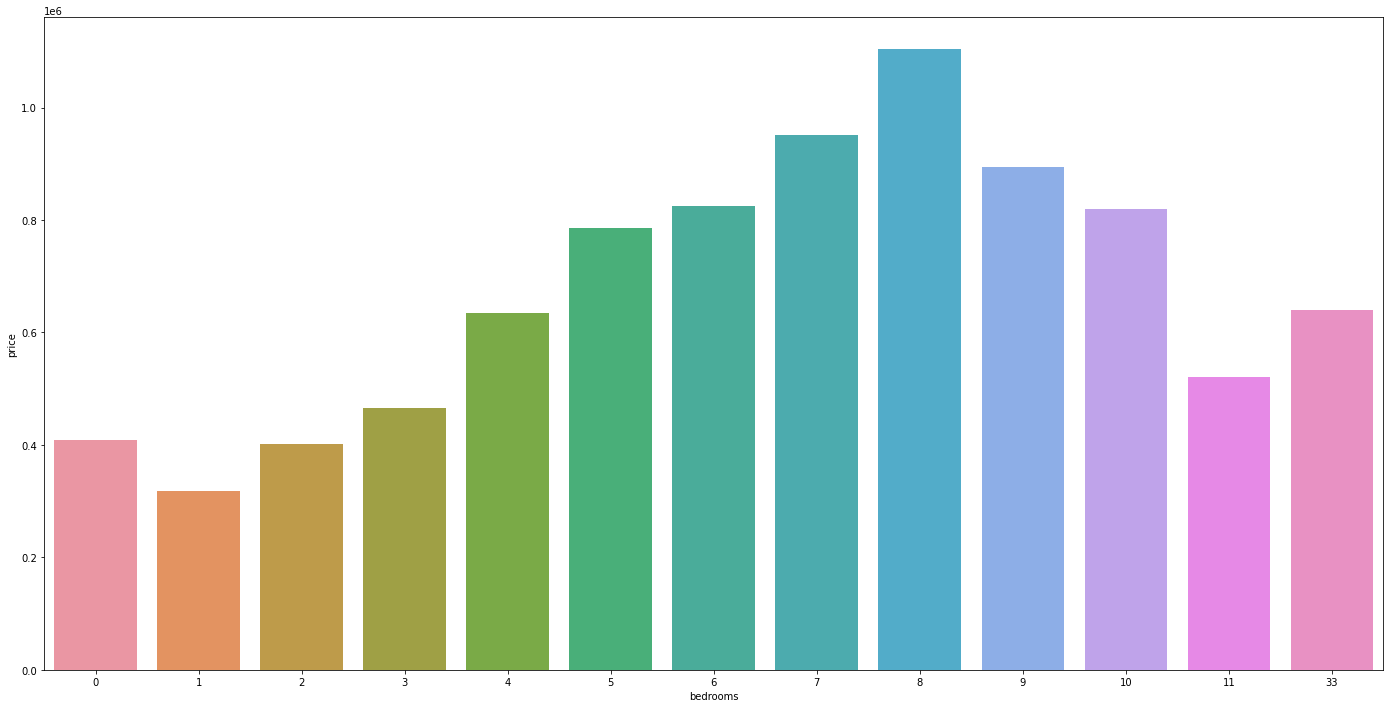

In [726]:
plt.figure( figsize=(24,12))
data = df[['price', 'bedrooms']].groupby( 'bedrooms' ).mean().reset_index()
sns.barplot( x='bedrooms', y='price', data=data );

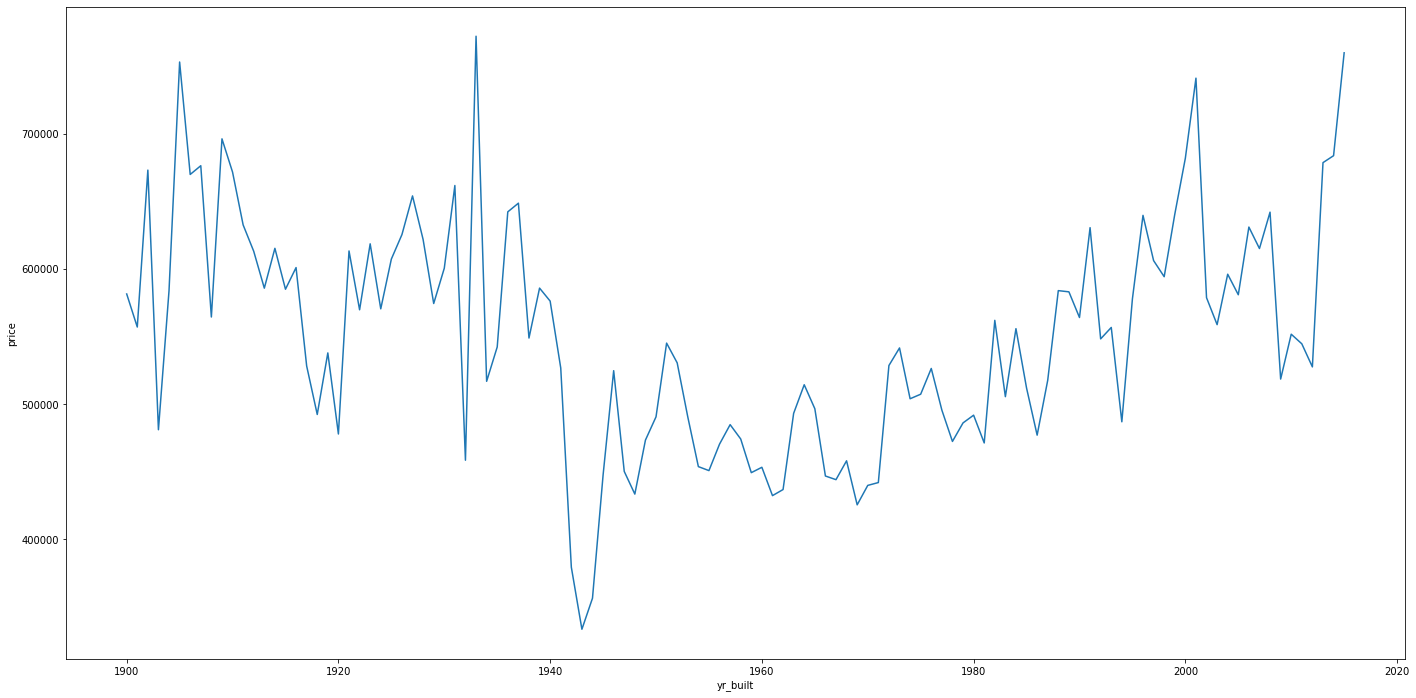

In [727]:
plt.figure( figsize=(24,12))
data = df[['price', 'yr_built']].groupby( 'yr_built' ).mean().reset_index()
sns.lineplot( x='yr_built', y='price', data=data );

In [728]:
import pandas as pd
from geopy.geocoders import Nominatim
df=df.head(10)

#Create empty rows
df['road']='NA'
df['house_number']='NA'
df['city']='NA'
df['county']='NA'
df['state']='NA'
df['neighbourhood']='NA'

geolocator=Nominatim(user_agent='geoapiExercises')

for i in range(len(df)):
    print('Loop:{}/{}'.format(i,len(df)))
    df
    query=str(df.loc[i,'lat'])+','+str(df.loc[i,'long'])

#API Request
    response=geolocator.reverse(query)

#populate df
    if 'house_number' in response.raw['address']:
        df.loc[i,'house_number']=response.raw['address']['house_number']
    if 'road' in response.raw['address']:
        df.loc[i,'road']        =response.raw['address']['road']
    if 'city' in response.raw['address']:
        df.loc[i,'city']        =response.raw['address']['city']
    if 'county' in response.raw['address']:
        df.loc[i,'county']      =response.raw['address']['county']
    if 'state' in response.raw['address']:
        df.loc[i,'state']       =response.raw['address']['state']
    if 'neighbourhood' in response.raw['address']:
        df.loc[i,'neighbourhood']=response.raw['address']['neighbourhood']



Loop:0/10
Loop:1/10
Loop:2/10
Loop:3/10
Loop:4/10
Loop:5/10
Loop:6/10
Loop:7/10
Loop:8/10
Loop:9/10


In [729]:
#df.to_csv('Datasets/df_complete_lat_long.csv',index=False)
df=pd.read_csv('Datasets/df_complete_lat_long.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,dormitory_type,condition_type,level,size,road,house_number,city,county,state,neighbourhood
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,house,regular,level_00,1180,61st Avenue South,10012,Seattle,King County,Washington,Rainier Beach
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,house,regular,level_02,2170,Northeast 127th Street,837,Seattle,King County,Washington,NaN
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,apartment,regular,level_00,770,81st Avenue Northeast,15109,Kenmore,King County,Washington,NaN
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,house,NaN,level_02,1050,Fauntleroy Way Southwest,9236,Seattle,King County,Washington,Fauntleroy
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,house,regular,level_02,1680,221st Avenue Northeast,923,Sammamish,King County,Washington,NaN


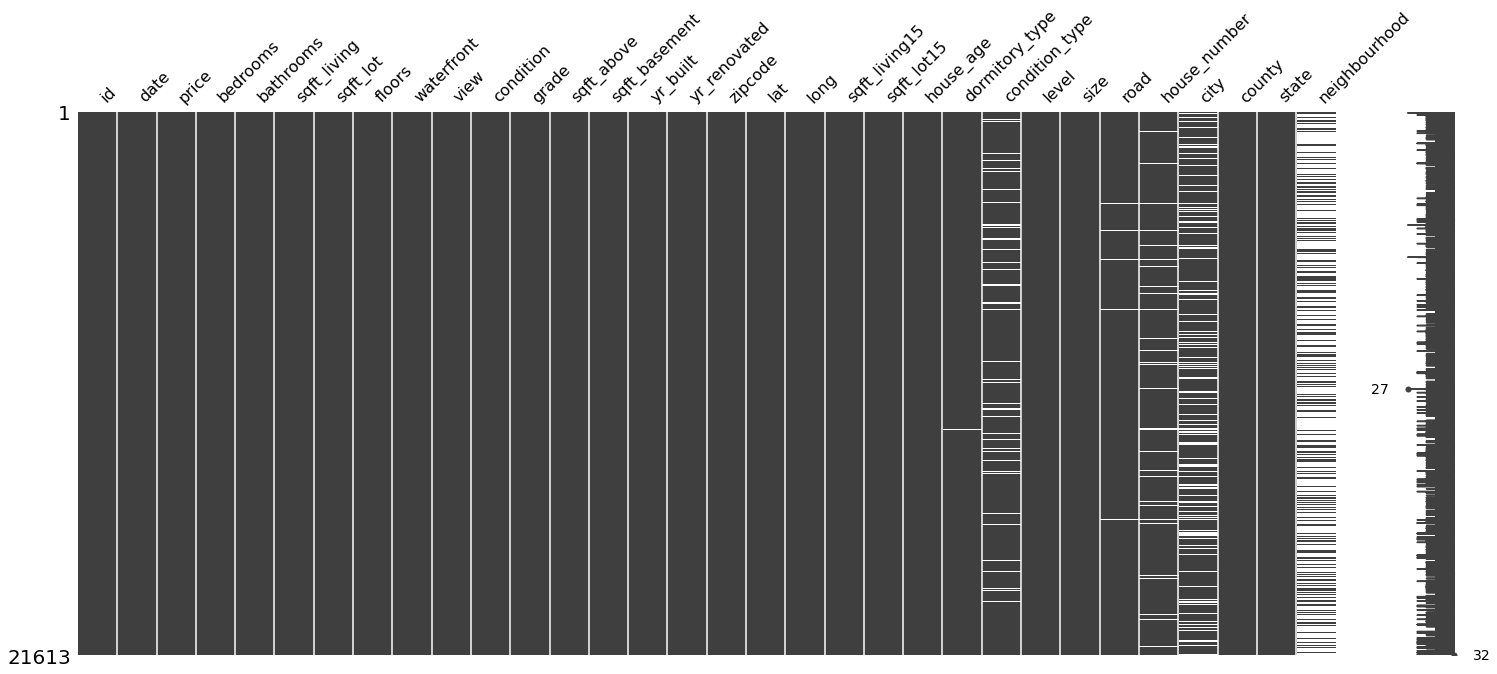

In [730]:
%matplotlib inline
msno.matrix(df);

In [731]:
df.dtypes

id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront          int64
view                int64
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
yr_built           object
yr_renovated       object
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
house_age          object
dormitory_type     object
condition_type     object
level              object
size                int64
road               object
house_number       object
city               object
county             object
state              object
neighbourhood      object
dtype: object

In [749]:
# Prepare data
    
df['is_waterfront'] = df['waterfront'].apply( lambda x: 'yes' if x == 1 else 'no' )

# # define level of prices

df['level']=df['price'].apply(lambda x:  0 if x<=321950 else
                                         1 if (x>321950)&(x<=450000)else
                                         2 if (x>450000)&(x<=645000)else 3)
df['level'] = df['level'].astype(int)

# Iteractive buttons

price_limit = widgets.IntSlider(
    value = int(df['price'].mean()),min = int(df['price'].min()),
    max = int(df['price'].max()),step = 1,description='Maximun Price',
    disable=False,style={'description_width': 'initial'}
    )

waterfront_bar = widgets.Dropdown(
    options = df['is_waterfront'].unique().tolist(),
    value = 'no',
    description = 'Water View',
    disable=False
    )

livingroom_limit = widgets.IntSlider(
    value = int( df['sqft_living'].mean() ),
    min = df['sqft_living'].min(),
    max = df['sqft_living'].max(),
    step = 1,
    description='Minimum Living Room Size',
    disable=False,
    style={'description_width': 'initial'}
    )

bathroom_limit = widgets.IntSlider(
    value = int( df['bathrooms'].mean() ),
    min = df['bathrooms'].min(),
    max = df['bathrooms'].max(),
    step = 1,
    description='Minimum Bathroom Number',
    disable=False,
    style={'description_width': 'initial'}
    )

basement_limit = widgets.IntSlider(
    value = int( df['sqft_basement'].mean() ),
    min = df['sqft_basement'].min(),
    max = df['sqft_basement'].max(),
    step = 1,
    description='Minimum Basement Size',
    disable=False,
    style={'description_width': 'initial'}
    )

condition_limit = widgets.IntSlider(
    value =  int(df['condition'].mean()) ,
    min = df['condition'].min(),
    max = df['condition'].max(),
    step = 1,
    description='Minimum condition',
    disable=False,
    style={'description_width': 'initial'}
    )

year_limit = widgets.IntSlider (
    value =  int(df['yr_built'].mean()),
    min =  df['yr_built']).min(),
    max = df['yr_built'].max(),
    step = 1,
    description='Year Built',
    disable=False,
    style={'description_width': 'initial'}
)

IndentationError: unexpected indent (1322879589.py, line 70)

In [740]:
def update_map( df, waterfront, limit, livingroom_limit, bathroom_limit,basement_limit, 
               condition_limit, year_limit ):
    houses = df[(df['price'] <= limit) &
    (df['is_waterfront'] == waterfront) &
    (df['sqft_living'] >= livingroom_limit) &
    (df['bathrooms'] >= bathroom_limit) &
    (df['sqft_basement'] >= basement_limit) &
    (df['condition'] >= condition_limit) &
    (df['yr_built'] >= year_limit )][['id', 'lat', 'long', 'price','level']]
    
#plot map
    fig = px.scatter_mapbox( houses,
            lat="lat",
            lon="long",
            size="price",
            color="level",
            color_continuous_scale=px.colors.cyclical.IceFire,
            size_max=15,
            zoom=10)

    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()                    

In [748]:
widgets.interactive( update_map,
    df=fixed( df ),
    waterfront=waterfront_bar,
    limit=price_limit,
    livingroom_limit=livingroom_limit,
    bathroom_limit=bathroom_limit,
    basement_limit=basement_limit,
    condition_limit=condition_limit,
    year_limit=year_limit
)

ValueError: cannot find widget or abbreviation for argument: 'year_limit'

In [742]:
# Change df format
df['year'] = pd.to_datetime( df['date'] ).dt.strftime( '%Y' )
df['date'] = pd.to_datetime( df['date'] ).dt.strftime( '%Y-%m-%d' )
df['year_week'] = pd.to_datetime( df['date'] ).dt.strftime( '%Y-%U' )

# # ----------------------------
# # Filtering
# # ----------------------------

# Widget to control df
date_limit = widgets.SelectionSlider(
options = df['date'].sort_values().unique().tolist(),
value='2014-12-01',
description='Max Available Date',
disable=False,
continuous_update=False,
orientation='horizontal',
style={'description_width': 'initial'},
readout=True
)
# # Max Year Renovated
year_limit = widgets.SelectionSlider(
options = df['yr_renovated'].sort_values().sort_values().unique().tolist(),
value=2000,
description='Max Year',
disable=False,
continuous_update=False,
orientation='horizontal',
style={'description_width': 'initial'},
readout=True
)
# # Waterfront
waterfront_limit = widgets.Checkbox(
value=False,
description='Waterfront?',
disabled=False,
indent=False )
    
def update_map( df, date_limit, year_limit, waterfront_limit ):
    # Filter df
    df = df[(df['date'] <= date_limit) & 
            (df['yr_renovated'] >= year_limit) & 
            (df['waterfront'] == waterfront_limit)].copy()
    
    fig = plt.figure( figsize=(24, 12) )
    specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig )
    
    ax1 = fig.add_subplot( specs[0, :] ) # First Row
    ax2 = fig.add_subplot( specs[1, 0] ) # First Row First Column
    ax3 = fig.add_subplot( specs[1, 1] ) # Second Row First Column
    
    # First Graph
    by_year = df[['price', 'year']].groupby( 'year' ).count().reset_index()
    sns.barplot( x = 'year', y ='price', data=by_year, ax=ax1)
    
#   # Second Graph

    by_day = df[['price', 'date']].groupby( 'date' ).mean().reset_index()
    sns.lineplot( x='date', y='price',data=by_day, ax=ax2)
    ax2.set_title( "Title: Avg Price by Day" )
    
#   # Third Graph
    
    df['year_week'] = pd.to_datetime( df['date'] ).dt.strftime( '%Y-%U' )
    by_week_of_year = df[['price', 'year_week']].groupby( 'year_week' ).mean().reset_index()
    sns.barplot( x='year_week', y='price', data=by_week_of_year,ax=ax3 )
    ax3.set_title( "Title: Avg Price by Week of Year" )
    
    plt.xticks( rotation=60);



TraitError: Invalid selection: value not found

In [743]:
widgets.interactive( update_map,df = fixed(df),
date_limit=date_limit,
year_limit=year_limit,
waterfront_limit=waterfront_limit )

NameError: name 'year_limit' is not defined